Dan Clayton<br>
DSC-550 Exercise 4.2

In [16]:
#Import the needed libraries
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#1) Load the data as a Pandas data frame and ensure that it imported correctly.
df = pd.read_csv('auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
#2) Begin by prepping the data for modeling:
#Remove the car name column
#df.drop('car name', inplace=True, axis=1)
if df.columns[-1] == 'car name':
    df.drop(columns=df.columns[-1], axis=1, inplace=True)

#The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
df['horsepower'] = pd.to_numeric(df['horsepower'], 'coerce').pipe(lambda s: s.fillna(s.mean()))

#Create dummy variables for the origin column.
#Dictionary to replace values with
origin_dict = {1:'North America', 2:'Europe', 3:'Japan'}

#Remap with dummpy variables for the origin column
df['origin'] = df['origin'].map(origin_dict)

df.head(20)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,North America
1,15.0,8,350.0,165.0,3693,11.5,70,North America
2,18.0,8,318.0,150.0,3436,11.0,70,North America
3,16.0,8,304.0,150.0,3433,12.0,70,North America
4,17.0,8,302.0,140.0,3449,10.5,70,North America
5,15.0,8,429.0,198.0,4341,10.0,70,North America
6,14.0,8,454.0,220.0,4354,9.0,70,North America
7,14.0,8,440.0,215.0,4312,8.5,70,North America
8,14.0,8,455.0,225.0,4425,10.0,70,North America
9,15.0,8,390.0,190.0,3850,8.5,70,North America


In [4]:
#3) Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
matrix = df.corr()
print(matrix)

#Many features highly correlated with MPG...listed in order:
#1) Weight
#2) Displacement
#3) Cylinders
#4) Horsepower

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   

              acceleration  model year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.684259   -0.411651  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model year        0.288137    1.000000  


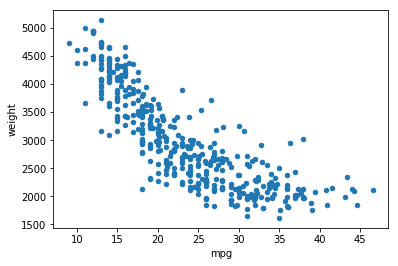

In [12]:
#4) Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
mpg_plot = df.plot.scatter(x='mpg', y='weight')

#As weight increases, mpg decreases--as weight decreases, MPG increases
#There is a definite and strong correlation between having higher MPG and being lighter wight

In [18]:
#5) Randomly split the data into 80% training data and 20% test data, where your target is mpg.

#Create the train and test split
#X_train, X_test, y_train, y_test = train_test_split(df['mpg'].values, df.drop(['mpg'],axis=1).values, test_size=0.20, random_state=42)

# Split the data into training/testing sets
x_train = df.drop(['mpg', 'origin'],axis=1).values[:-20]
x_test = df.drop(['mpg', 'origin'],axis=1).values[-20:]

# Split the targets into training/testing sets
y_train = df['mpg'].values[:-20]
y_test = df['mpg'].values[-20:]



#Print summary stats to see the test split worked
print('Total Set', len(df['mpg']))
print('Train should be', str(round(len(df['mpg'])*.8,0)))
print('Test should be', str(round(len(df['mpg'])*.2,0)))

print('X Train', len(X_train))
print('X Test', len(X_test))
print('Y Train', len(y_train))
print('Y Test', len(y_test))


Total Set 398
Train should be 318.0
Test should be 80.0
X Train 318
X Test 80
Y Train 378
Y Test 20


In [19]:
#6) Train an ordinary linear regression on the training data.

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)


"\n#Create dummy regressor\ndummy = DummyRegressor(strategy='mean')\n\n#Train dummy regressor\ndummy.fit(y_train,X_train)\n"

In [21]:
#7) Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-0.20500203  0.0031214   0.00479956 -0.00670083  0.06590905  0.72813858]
Mean squared error: 20.25
Coefficient of determination (R2): 0.32


In [24]:
#8) Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

#Repeating steps above using "Lasso" model
reg = linear_model.Lasso(alpha=0.1)

# Train the model using the training sets
reg.fit(x_train, y_train)

# Make predictions using the testing set
lasso_y_pred = reg.predict(x_test)

#Providing summary statistics for the lasso model output
# The coefficients
print("Coefficients: \n", reg.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lasso_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, lasso_y_pred))

#Conclusion--the mean squared error is marginally higher (worse) using the lasso regression model

Coefficients: 
 [-0.00000000e+00 -3.32719761e-04  1.91432464e-03 -6.61901282e-03
  3.28059968e-02  7.16392156e-01]
Mean squared error: 20.63
Coefficient of determination (R2): 0.31
